SOSNEP03NB01

<img src="https://raw.githubusercontent.com/microsoft/dataexposed/main/graphics/sosn-white-new-very-small.jpg" alt="Logo" height="150">

## Linear Regression

We're wondering if the salary at a certain company is largely determined simply by how long people work there. We'll start with a Linear model to see if there is a strong relationship. 

First, let's set up our libraries:

In [63]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
print("Libraries Loaded.")

Libraries Loaded.


Now we can load the salaries and time-at-company from our sample data:

In [64]:
salaries = pd.read_csv("Samples.csv")
salaries.describe()

,Salary,Employed
count,74.000000,74.000000
mean,128045.135135,16.428378
std,6803.004623,1.254310
min,114380.000000,12.000000
25%,123480.000000,15.925000
50%,127995.000000,16.650000
75%,132510.000000,17.350000
max,142870.000000,18.000000


Let's get our X's and Y's:

In [65]:
Y = salaries["Salary"]
x1 = salaries["Employed"]
print(Y, x1)

0     119980
1     116480
2     123200
3     117950
4     118510
       ...  
69    135170
70    135310
71    124460
72    138250
73    135380
Name: Salary, Length: 74, dtype: int64 0     12.0
1     12.6
2     12.7
3     13.7
4     14.2
      ... 
69    17.9
70    18.0
71    18.0
72    18.0
73    18.0
Name: Employed, Length: 74, dtype: float64


We'll create a scatter plot, and connect ALL the dots with a line:

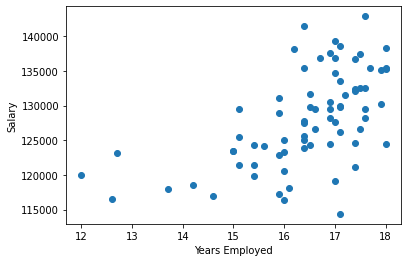

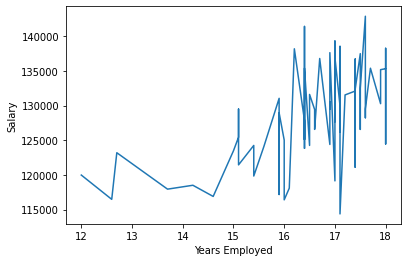

In [67]:
plt.scatter(x1,Y)
plt.xlabel("Years Employed")
plt.ylabel("Salary")
# add labels?
plt.show()
plt.xlabel("Years Employed")
plt.ylabel("Salary")
plt.plot(x1,Y)

Hmm...not super-helpful to make a preduction. 

  

OK, let's use the statsmodel library to create a model to do predictions, using Ordinary Least Squares:

In [68]:
x = sm.add_constant(x1)
results = sm.OLS(Y,x).fit()
results.summary()

C:\Users\antho\azuredatastudio-python\0.0.1\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     34.65
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           1.15e-07
Time:                        09:45:37   Log-Likelihood:                -743.02
No. Observations:                  74   AIC:                             1490.
Df Residuals:                      72   BIC:                             1495.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.726e+04   8652.950      8.929      0.000       6e+04    9.45e+04
Employed    3091.3536    525.200      5.886      0.000    2044.387    4138.320
==============================================================================
Omnibus:                        0.416   Durbin-Watson:                   2.410
Prob(Omnibus):                  0.812   Jarque-Bera (JB):                0.103
Skew:                          -0.067   Prob(JB):                        0.950
Kurtosis:                       3.125   Cond. No.                         219.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Very cool. Let's now show that regression line graphically, so we can see what the trend and prediction looks like:

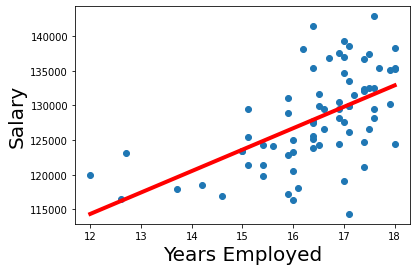

In [13]:
plt.scatter(x1,Y)
Yhat = 3091*x1 + 77260
plt.plot(x1,Yhat, lw=4, c="Red", label = "Linear regression line")
plt.xlabel("Years Employed", fontsize = 20)
plt.ylabel("Salary", fontsize = 20)
plt.show()

MUCH better! And now we can show not only that as you work at this company longer you might expect better pay, but we show that relationship isn't super-strong. I think we need more variables. What do you think?

## Now, let's get logical

Logistic regression for classification

In [69]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
print("First 10 X are: ", X[:10,:])
print("All y is: ", y)

First 10 X are:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
All y is:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [61]:
clf = LogisticRegression(random_state=0).fit(X, y)
print("Sample prediction: ", clf.predict(X[48:51, :]))
print("Sample prediction's probability: ", clf.predict_proba(X[48:51, :]))
print("Accuracy: ", clf.score(X, y))

Sample prediction:  [0 0 1]
Sample prediction's probability:  [[9.78573121e-01 2.14268600e-02 1.85508726e-08]
 [9.78661656e-01 2.13383246e-02 1.91473694e-08]
 [2.11817318e-03 8.74345855e-01 1.23535972e-01]]
Accuracy:  0.9733333333333334


C:\Users\antho\azuredatastudio-python\0.0.1\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
